In [2]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv', parse_dates=['start', 'end'])

In [5]:
df

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
...,...,...,...,...,...,...,...,...
395542,517117,2019-02-04,2019-03-06,0,3,보건복지,명절연휴 고속도로 무료반대,명절고속도로 무료보단 대다수의 서민들이 이용하는 대중교통 무료와 명절기간 증차로 했...
395543,517119,2019-02-04,2019-03-06,0,23,보건복지,광주사태 가짜 유공자들 정수기로 걸려내야함,광주사태 유공자들 차고 넘치는데 이래 많은 유공자들 그냥놓아두면 재앙이다.\n김대중...
395544,517120,2019-02-04,2019-03-06,0,0,안전/환경,환경문제,명절이면 후로 제일문제는 쓰레기 문제 입니다.\n제일문제는 선물세트와 농산물세트 입...
395545,517121,2019-02-04,2019-03-06,0,20,정치개혁,"청화대,더불어민주당, 당장 답하라,,,,,,","좌파 더불어민주당, 좌파 정권 청화대는 선한 국민들을 더는 기망하지 말고 담장 답하..."


In [168]:
df['period']=df['end']-df['start']
df["period"] = (df["period"]).dt.days
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395547 entries, 0 to 395546
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   article_id  395547 non-null  int64         
 1   start       395547 non-null  datetime64[ns]
 2   end         395547 non-null  datetime64[ns]
 3   answered    395547 non-null  int64         
 4   votes       395547 non-null  int64         
 5   category    395547 non-null  object        
 6   title       395547 non-null  object        
 7   content     395546 non-null  object        
 8   period      395547 non-null  int64         
 9   year        395547 non-null  int64         
 10  month       395547 non-null  int64         
dtypes: datetime64[ns](2), int64(6), object(3)
memory usage: 33.2+ MB


In [146]:
df['category'].values

array(['안전/환경', '기타', '미래', ..., '안전/환경', '정치개혁', '인권/성평등'], dtype=object)

## 답변수가 가장 많은 카테고리 구하기

In [136]:
df1=df.groupby(by='category').sum()
df1['category']=np.arange(df1.shape[0])


<IPython.core.display.Javascript object>


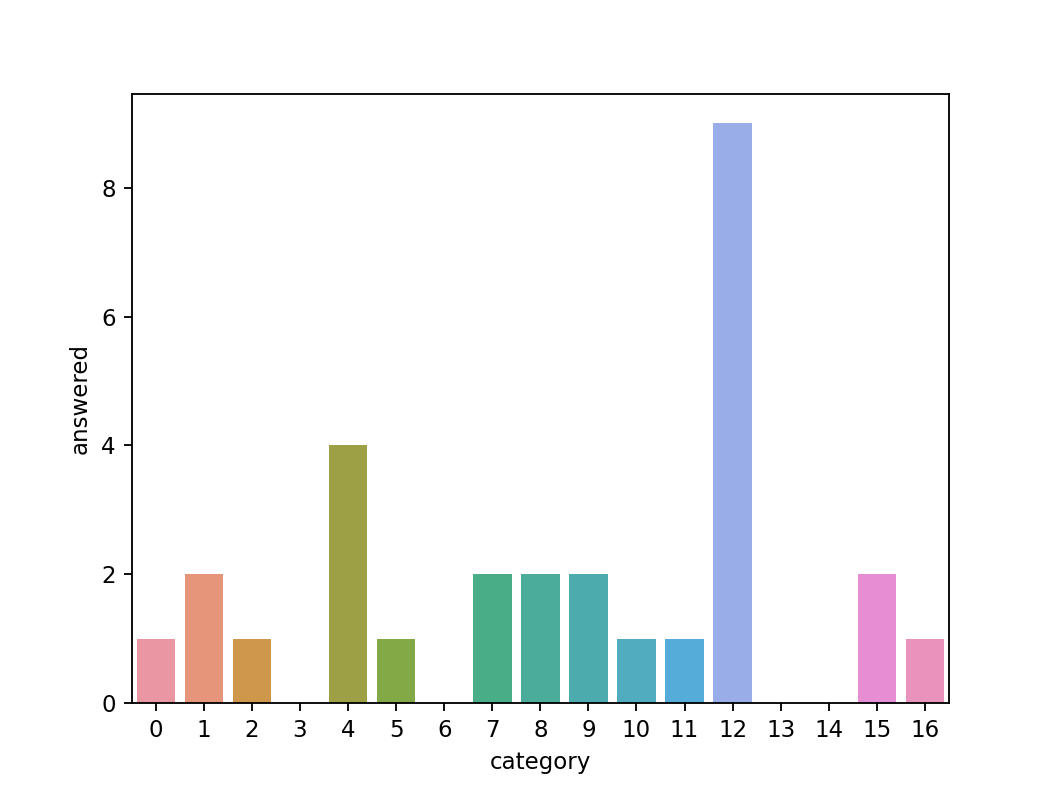

In [137]:
ax1=plt.subplots()
ax1=sns.barplot(x='category',y='answered',data=df1)

## 답변수가 가장 많은 기간 구하기

## 청원이 많이 등록된 달 찾기

In [94]:
df['month']=df['start'].dt.month

<IPython.core.display.Javascript object>


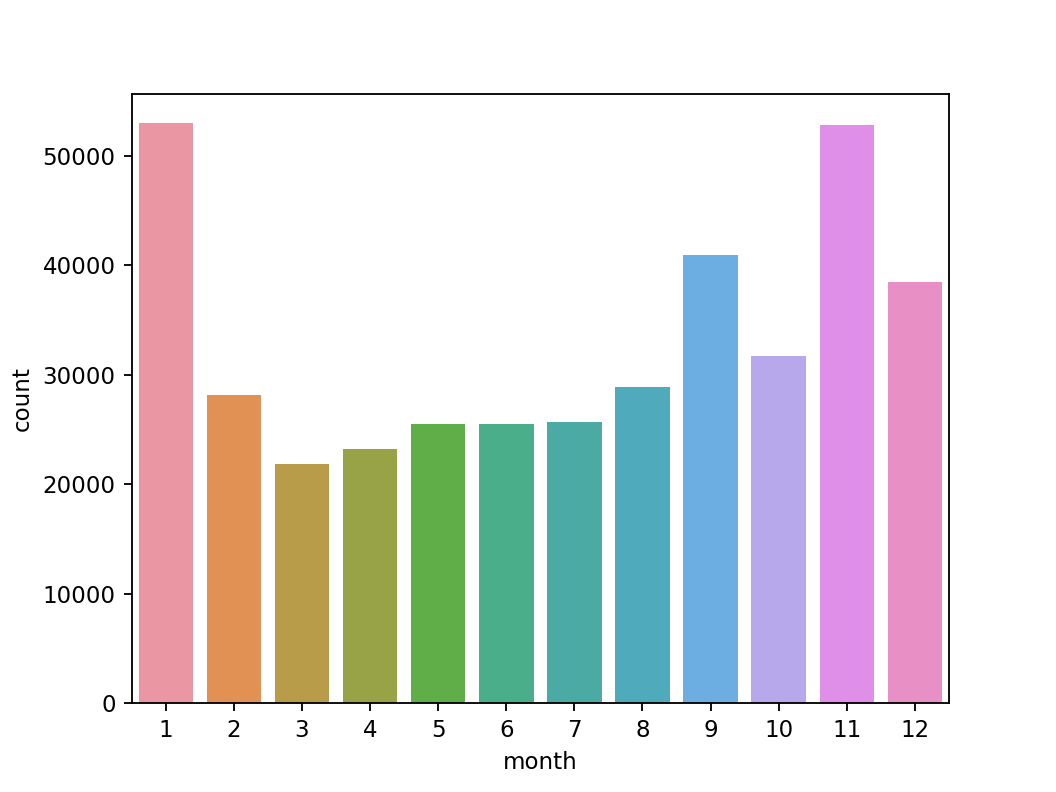

In [100]:
ax3=plt.subplots()
ax3=sns.countplot('month',data=df)

## 2018년 달마다 어떤 category의 청원이 많았는지 찾기

In [171]:
df['year']=df['start'].dt.year
df_2018=df[df['year']==2018]
list=df_2018.groupby('month')['category'].value_counts()
list=pd.DataFrame(list)
list

category
month category             
1     정치개혁             4168
      기타               3553
      미래               3095
      경제민주화            3054
      문화/예술/체육/언론      2336
...                     ...
12    문화/예술/체육/언론       634
      성장동력              511
      저출산/고령화대책         208
      반려동물              155
      농산어촌              108

[204 rows x 1 columns]

<IPython.core.display.Javascript object>


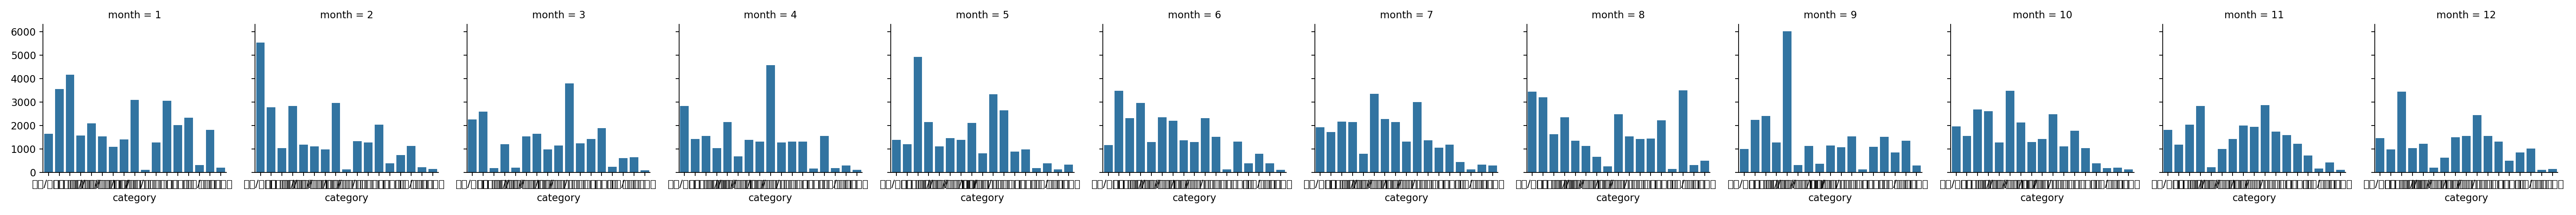

C:\Users\jeehy\anaconda3\envs\test\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\jeehy\anaconda3\envs\test\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jeehy\anaconda3\envs\test\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44428 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jeehy\anaconda3\envs\test\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jeehy\anaconda3\envs\test\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jeehy\anaconda3\envs\test\lib\site-pack

In [126]:
facet=sns.FacetGrid(df_2018,col='month')
facet.map(sns.countplot,'category')

## 투표기간과 투표수가 관계가 있을까?

<IPython.core.display.Javascript object>


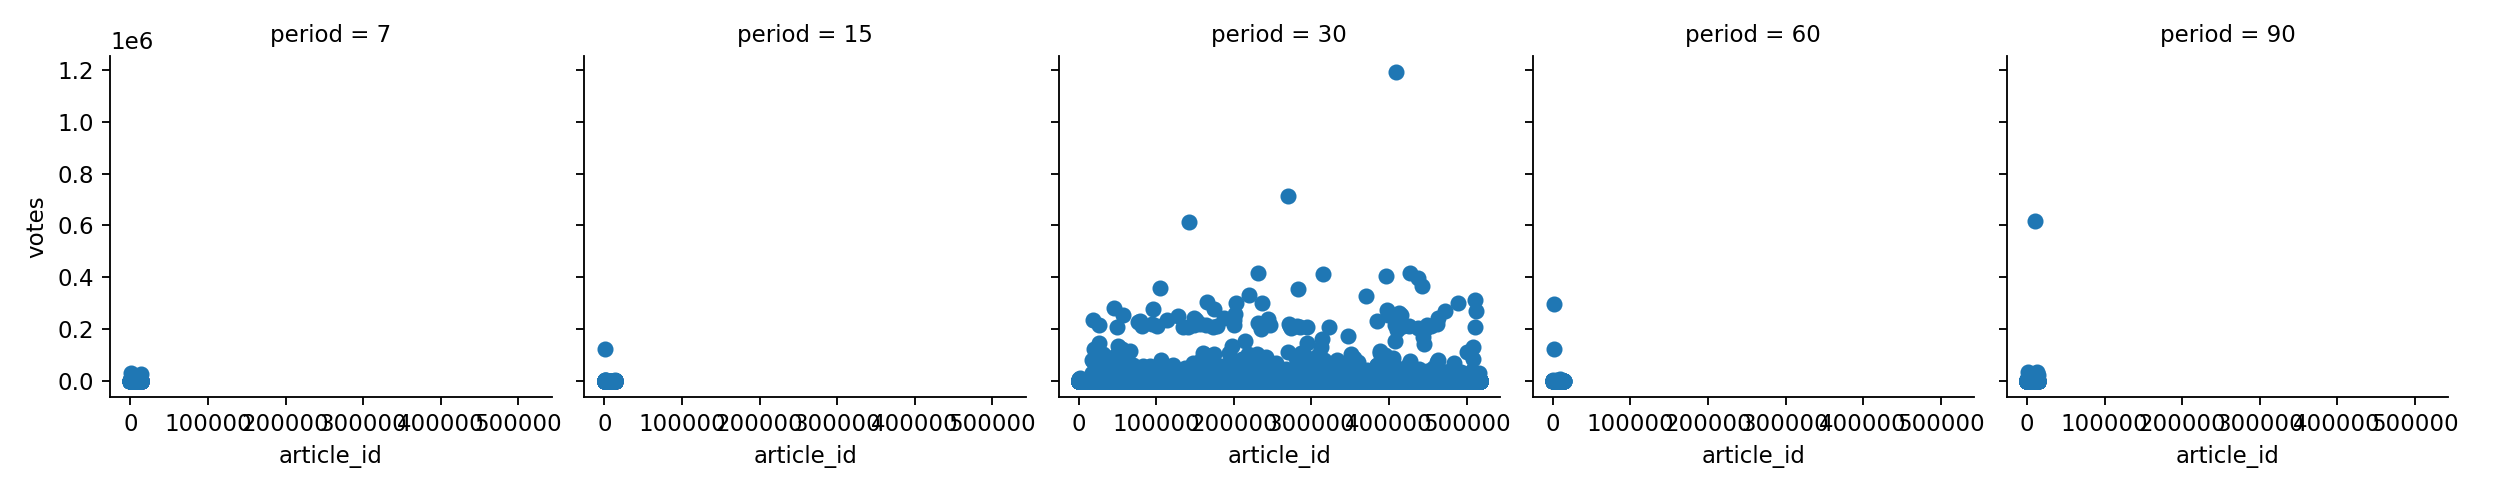

In [169]:
facet1=sns.FacetGrid(df,col='period')
facet1.map(plt.scatter,'article_id','votes')
facet1=facet1.add_legend()

## 투표수와 title의 길이와의 관계- title이 길수록 투표수가 높을까?

In [7]:
df['title'].astype(str)
df['문자수']=[len(i) for i in df['title']]

C:\Users\jeehy\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<IPython.core.display.Javascript object>


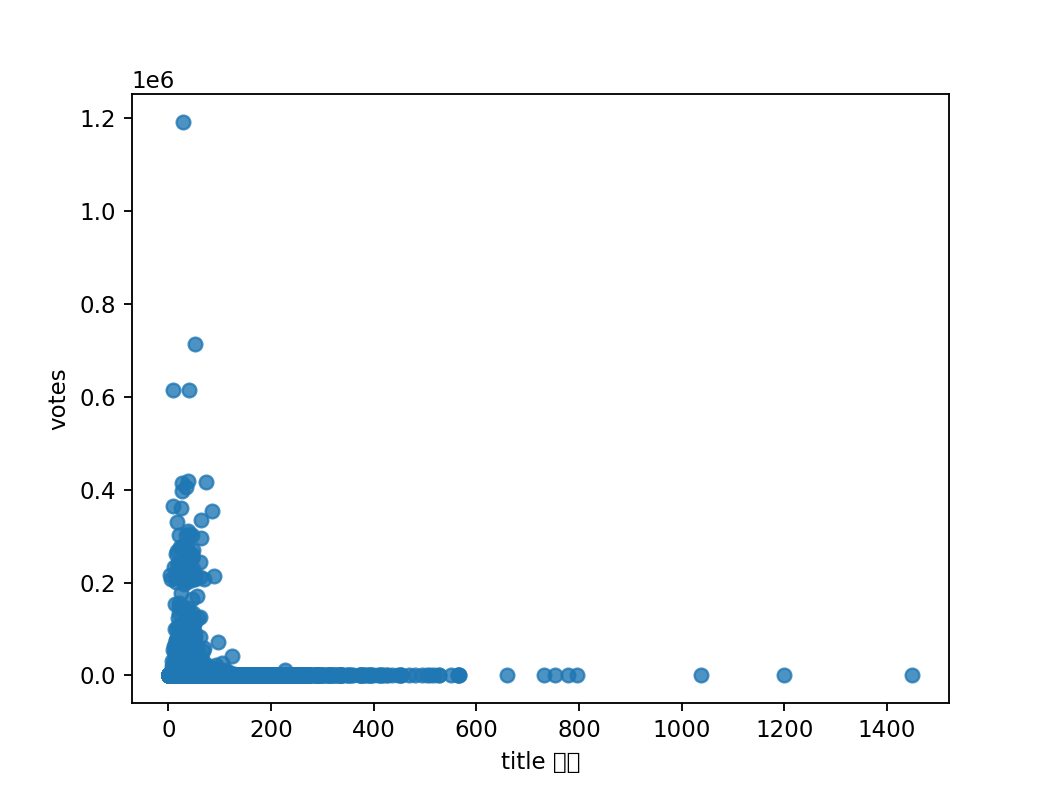

Text(0.5, 0, 'title 길이')

In [8]:
df=df[df['votes']>0]
ax5=plt.subplots()
ax5=sns.regplot(x='문자수',y='votes',data=df,fit_reg=False)
ax5.set_xlabel('title 길이')